# Logistic Regression: Glass Identification

#  Predicting a Continuous Response

# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names,index_col='id')
#glass.sort('al', inplace=True)
glass.head()

## we assume a linear relationship between al and ri , Create a scatter plot with al on the x-axis and ri on the y-axis, and draw the line of best fit.

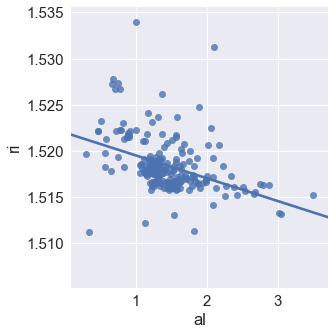

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)
sns.lmplot(x='al',y='ri',data = glass, ci=None)

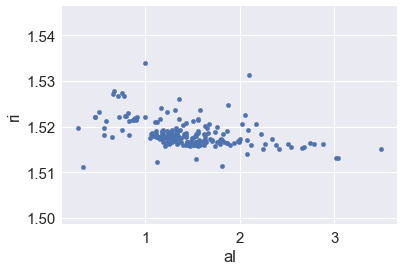

In [4]:
# lets plot scatter plot without using seaborn
glass.plot(kind='scatter', x='al',y ='ri')

Text(0,0.5,'ri')

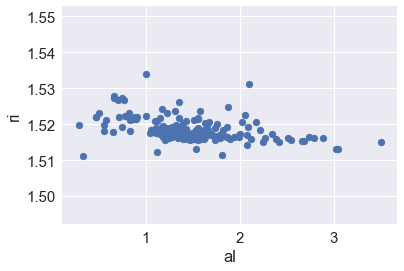

In [5]:
# equivalent scatter plot using Matplotlib
plt.scatter(glass.al, glass.ri)
plt.xlabel('al')
plt.ylabel('ri')

In [8]:
from sklearn.linear_model import LinearRegression
linreg= LinearRegression()
feature_cols=['al']
X = glass[feature_cols]
y = glass.ri
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
glass['re_pred']=linreg.predict(X)

In [10]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,re_pred
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873


Text(0,0.5,'Predicted ri')

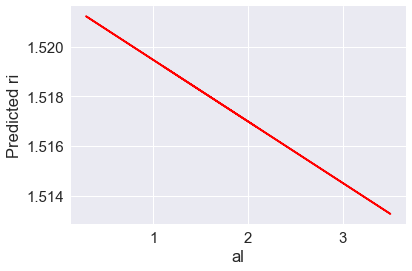

In [12]:
# plot those predictions connected by a line
plt.plot(glass.al, glass.re_pred, color='red')
plt.xlabel('al')
plt.ylabel('Predicted ri')

Text(0,0.5,'ri')

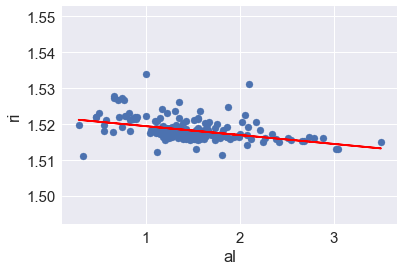

In [14]:
# put the plots together
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.re_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri')

In [15]:
#Refresher: interpreting linear regression coefficients
#Linear regression equation: y=β0+β1x

In [16]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([ 1.51699012])

In [17]:
# compute prediction for al=2 using the predict method
linreg.predict(2)

array([ 1.51699012])

In [19]:
# examine coefficient for al
print(zip(feature_cols, linreg.coef_))

In [20]:
#Interpretation: A 1 unit increase in 'al' is associated with a 0.0025 unit decrease in 'ri'.

In [21]:
# increasing al by 1 (so that al=3) decreases ri by 0.0025
1.51699012 - 0.0024776063874696243

1.5145125136125304

In [22]:
# compute prediction for al=3 using the predict method
linreg.predict(3)

array([ 1.51451251])

# Part 2: Predicting a Categorical Response

In [23]:
# examine glass_type
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [26]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,re_pred,household
id,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0


Text(0,0.5,'household')

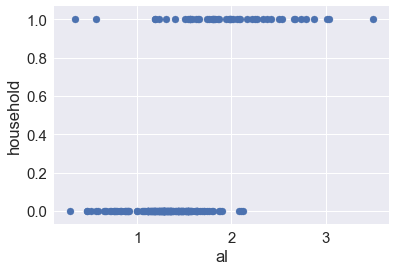

In [27]:
#Let's change our task, so that we're predicting household using al. Let's visualize the relationship to figure out how to do this

plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

In [28]:
# fit a linear regression model and store the predictions
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

Text(0,0.5,'household')

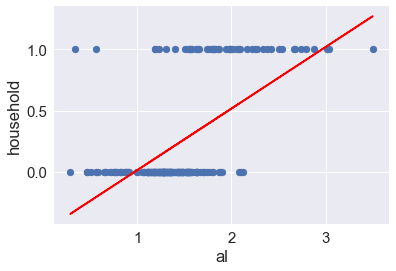

In [29]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [30]:
#If al=3, what class do we predict for household? 1

#If al=1.5, what class do we predict for household? 0

#We predict the 0 class for lower values of al, and the 1 class for higher values of al. What's our cutoff value? Around al=2, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

#Therefore, we'll say that if household_pred >= 0.5, we predict a class of 1, else we predict a class of 0.

In [31]:
# understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'],
      dtype='<U5')

In [32]:
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)

glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,re_pred,household,household_pred,household_pred_class
id,,,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0,0.065459,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0,0.195765,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0,0.285976,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0,0.160682,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0,0.135623,0


Text(0,0.5,'household')

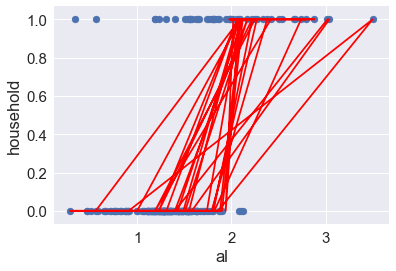

In [33]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

# Part 3: Using Logistic Regression Instead
#Logistic regression can do what we just did:

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

Text(0,0.5,'household')

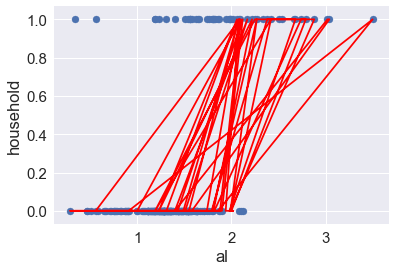

In [38]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [39]:
#What if we wanted the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction?

# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

Text(0,0.5,'household')

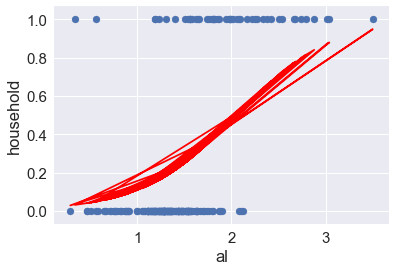

In [40]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [42]:
# examine some example predictions
print(logreg.predict_proba(1))
print(logreg.predict_proba(2))
print(logreg.predict_proba(3))

[[ 0.89253652  0.10746348]]
[[ 0.52645662  0.47354338]]
[[ 0.12953623  0.87046377]]


In [43]:
#The first column indicates the predicted probability of class 0, and the second column indicates the predicted probability of class 1.

# Part 4: Probability, odds, e, log, log-odds
probability=one outcome /all outcomes

probability=one outcome /all outcomes

odds=one outcome /all other outcomes

odds=one outcome /all other outcomes

Examples:

Dice roll of 1: probability = 1/6, odds = 1/5

Even dice roll: probability = 3/6, odds = 3/3 = 1

Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

odds=probability / 1−probability

odds=probability / 1−probability

probability=odds / 1+odds



In [44]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


In [45]:
#What is e? It is the base rate of growth shared by all continually growing processes:
np.exp(1)

2.7182818284590451

In [46]:
# What is a (natural) log? It gives you the time needed to reach a certain level of growth:
# time needed to grow 1 unit to 2.718 units
np.log(2.718)

0.99989631572895199

In [47]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


In [48]:
# What is Logistic Regression?
#Logistic regression outputs the probabilities of a specific class
#Those probabilities can be converted into class predictions
#The logistic function has some nice properties:

#Takes on an "s" shape
#Output is bounded by 0 and 1

Text(0,0.5,'household')

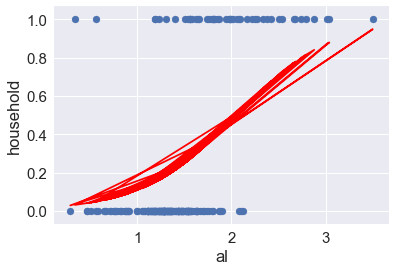

In [49]:
# Interpreting Logistic Regression Coefficients

plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [50]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([-0.10592543])

In [51]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([ 0.89949172])

In [52]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([ 0.47354338])

In [53]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba(2)[:, 1]

array([ 0.47354338])

In [54]:
# examine the coefficient for al
zip(feature_cols, logreg.coef_[0])

In [55]:
# increasing al by 1 (so that al=3) increases the log-odds by 4.18
logodds = 0.64722323 + 4.1804038614510901
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.99205808391674566

In [56]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba(3)[:, 1]

array([ 0.87046377])

In [57]:
# examine the intercept
logreg.intercept_

array([-4.12790736])

In [58]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([ 0.01586095])

In [59]:
# Using Logistic Regression with Categorical Features

In [60]:
# create a categorical feature
glass['high_ba'] = np.where(glass.ba > 0.5, 1, 0)

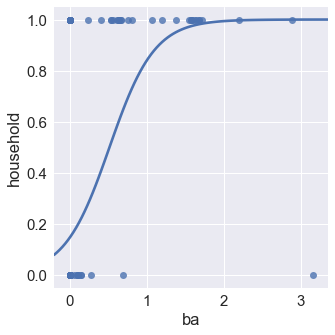

In [61]:
# original (continuous) feature
sns.lmplot(x='ba', y='household', data=glass, ci=None, logistic=True)

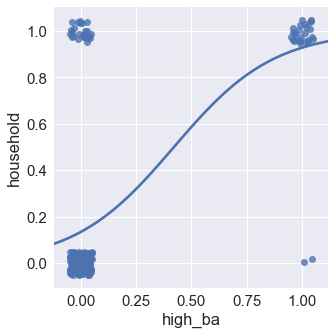

In [62]:
# categorical feature, with jitter added
sns.lmplot(x='high_ba', y='household', data=glass, ci=None, logistic=True, x_jitter=0.05, y_jitter=0.05)

In [63]:
# fit a logistic regression model
feature_cols = ['high_ba']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
# examine the coefficient for high_ba
zip(feature_cols, logreg.coef_[0])